# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime as dt

request_date = dt.date.today().strftime("%m/%d/%Y")

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"units": "imperial"}

print(f"Beginning Data Retrieval" + "\n" + "--------------------------------------------")

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record_counter = 1

for city in cities:
    try:
        query_url = f"{url}q={city}&appid={api_key}"
        response = requests.get(query_url, params=params).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record_counter} of {len(cities)}" + "| " + str(city))
    except:
        print(f"City not found, skipping.")
        pass
    record_counter = record_counter + 1

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of 646| tuktoyaktuk
Processing Record 2 of 646| ushuaia
Processing Record 3 of 646| wanning
Processing Record 4 of 646| rovaniemi
Processing Record 5 of 646| hobart
Processing Record 6 of 646| carnarvon
City not found, skipping.
Processing Record 8 of 646| port elizabeth
Processing Record 9 of 646| rikitea
Processing Record 10 of 646| vaini
Processing Record 11 of 646| broome
City not found, skipping.
City not found, skipping.
Processing Record 14 of 646| abay
Processing Record 15 of 646| qaanaaq
Processing Record 16 of 646| port augusta
Processing Record 17 of 646| gastonia
Processing Record 18 of 646| cerrito
Processing Record 19 of 646| esperance
Processing Record 20 of 646| harper
Processing Record 21 of 646| jamestown
City not found, skipping.
Processing Record 23 of 646| bluff
Processing Record 24 of 646| busselton
Processing Record 25 of 646| cape town
Processing Record 26 of 646| chuy
Proc

Processing Record 218 of 646| bubaque
Processing Record 219 of 646| northam
City not found, skipping.
Processing Record 221 of 646| bayburt
Processing Record 222 of 646| mokhsogollokh
Processing Record 223 of 646| namangan
Processing Record 224 of 646| san rafael
Processing Record 225 of 646| mlonggo
Processing Record 226 of 646| amahai
Processing Record 227 of 646| paso de patria
Processing Record 228 of 646| anshun
Processing Record 229 of 646| yerbogachen
Processing Record 230 of 646| san felipe
City not found, skipping.
Processing Record 232 of 646| talara
Processing Record 233 of 646| rypefjord
Processing Record 234 of 646| tasiilaq
Processing Record 235 of 646| aden
Processing Record 236 of 646| cherskiy
Processing Record 237 of 646| camacha
Processing Record 238 of 646| eseka
Processing Record 239 of 646| abu samrah
Processing Record 240 of 646| portel
Processing Record 241 of 646| raghogarh
Processing Record 242 of 646| rapid valley
Processing Record 243 of 646| amilly
Processi

Processing Record 436 of 646| inta
Processing Record 437 of 646| guerrero negro
Processing Record 438 of 646| isangel
Processing Record 439 of 646| dauphin
City not found, skipping.
Processing Record 441 of 646| loandjili
Processing Record 442 of 646| tatui
City not found, skipping.
Processing Record 444 of 646| george town
Processing Record 445 of 646| mahenge
Processing Record 446 of 646| palmas de monte alto
Processing Record 447 of 646| raga
Processing Record 448 of 646| george
Processing Record 449 of 646| sechura
Processing Record 450 of 646| taltal
Processing Record 451 of 646| te anau
Processing Record 452 of 646| aksha
Processing Record 453 of 646| tingo maria
Processing Record 454 of 646| walvis bay
City not found, skipping.
Processing Record 456 of 646| salvacion
Processing Record 457 of 646| taoudenni
Processing Record 458 of 646| ossora
Processing Record 459 of 646| salmas
Processing Record 460 of 646| jiayuguan
City not found, skipping.
Processing Record 462 of 646| nhamu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                       "Latitude": lat, "Longitude": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})
city_df.to_csv("output_data/cities.csv")
city_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Tuktoyaktuk,75,CA,1612571511,75,69.4541,-133.0374,-31.00,10.36
1,Ushuaia,75,AR,1612571421,76,-54.8000,-68.3000,46.40,26.46
2,Wanning,50,CN,1612571597,83,18.8003,110.3967,70.16,5.19
3,Rovaniemi,90,FI,1612571597,92,66.5000,25.7167,15.80,9.22
4,Hobart,75,AU,1612571484,60,-42.8794,147.3294,75.00,13.80
...,...,...,...,...,...,...,...,...,...
588,Norton,73,ZW,1612571699,87,-17.8833,30.7000,64.99,1.99
589,San Quintín,0,MX,1612571699,75,30.4833,-115.9500,59.50,13.09
590,Riacho de Santana,100,BR,1612571700,83,-13.6092,-42.9389,72.82,4.16
591,Catazaja,0,MX,1612571700,80,17.7250,-92.0167,72.10,4.09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_city_df = city_df[city_df["Humidity"] < 100]
clean_city_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Tuktoyaktuk,75,CA,1612571511,75,69.4541,-133.0374,-31.00,10.36
1,Ushuaia,75,AR,1612571421,76,-54.8000,-68.3000,46.40,26.46
2,Wanning,50,CN,1612571597,83,18.8003,110.3967,70.16,5.19
3,Rovaniemi,90,FI,1612571597,92,66.5000,25.7167,15.80,9.22
4,Hobart,75,AU,1612571484,60,-42.8794,147.3294,75.00,13.80
...,...,...,...,...,...,...,...,...,...
588,Norton,73,ZW,1612571699,87,-17.8833,30.7000,64.99,1.99
589,San Quintín,0,MX,1612571699,75,30.4833,-115.9500,59.50,13.09
590,Riacho de Santana,100,BR,1612571700,83,-13.6092,-42.9389,72.82,4.16
591,Catazaja,0,MX,1612571700,80,17.7250,-92.0167,72.10,4.09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

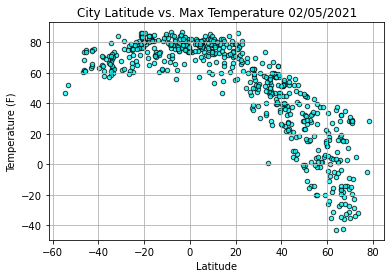

In [26]:
clean_city_df.plot.scatter("Latitude", "Max Temp", alpha=0.75, edgecolor="black", color="cyan", grid=True)
plt.ylabel("Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature " + str(request_date))
plt.savefig("Images/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

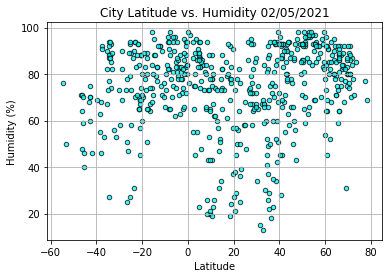

In [27]:
clean_city_df.plot.scatter("Latitude", "Humidity", alpha=0.75, edgecolor="black", color="cyan", grid=True)
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity " + str(request_date))
plt.savefig("Images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

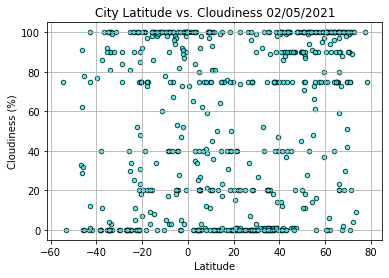

In [28]:
clean_city_df.plot.scatter("Latitude", "Cloudiness", alpha=0.75, edgecolor="black", color="cyan", grid=True)
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness " + str(request_date))
plt.savefig("Images/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

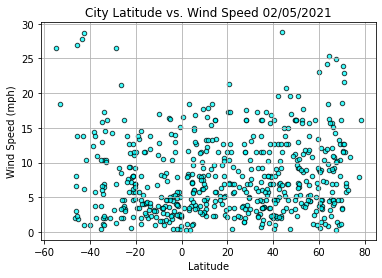

In [29]:
clean_city_df.plot.scatter("Latitude", "Wind Speed", alpha=0.75, edgecolor="black", color="cyan", grid=True)
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed " + str(request_date))
plt.savefig("Images/LatVsWind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7587509778010375


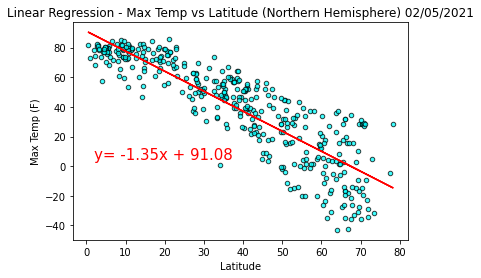

In [47]:
north_hem = clean_city_df[clean_city_df["Latitude"] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Latitude"], north_hem["Max Temp"])
nh_temp_lat_regress = north_hem["Latitude"] * slope + intercept
nh_temp_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

north_hem.plot.scatter("Latitude", "Max Temp", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(north_hem["Latitude"], nh_temp_lat_regress, "r-")
plt.annotate(nh_temp_lat_line_eq, (2, 5), fontsize=15, color="red")
plt.ylabel("Max Temp (F)")
plt.title(f"Linear Regression - Max Temp vs Latitude (Northern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/NHLatVsTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.262667372243929


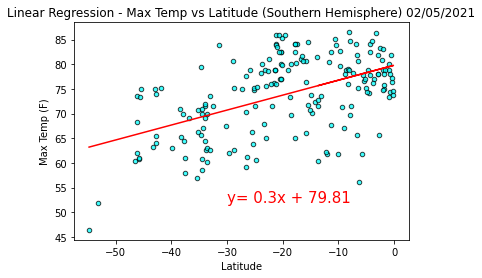

In [31]:
south_hem = clean_city_df[clean_city_df["Latitude"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Latitude"], south_hem["Max Temp"])
sh_temp_lat_regress = south_hem["Latitude"] * slope + intercept
sh_temp_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

south_hem.plot.scatter("Latitude", "Max Temp", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(south_hem["Latitude"], sh_temp_lat_regress, "r-")
plt.annotate(sh_temp_lat_line_eq, (-30, 52), fontsize=15, color="red")
plt.ylabel("Max Temp (F)")
plt.title(f"Linear Regression - Max Temp vs Latitude (Southern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/SHLatVsTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08781650375283807


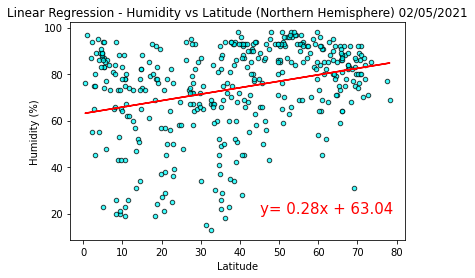

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Latitude"], north_hem["Humidity"])
nh_hum_lat_regress = north_hem["Latitude"] * slope + intercept
nh_hum_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

north_hem.plot.scatter("Latitude", "Humidity", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(north_hem["Latitude"], nh_hum_lat_regress, "r-")
plt.annotate(nh_hum_lat_line_eq, (45, 20), fontsize=15, color="red")
plt.ylabel("Humidity (%)")
plt.title(f"Linear Regression - Humidity vs Latitude (Northern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/NHLatVsHumidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12461183976649716


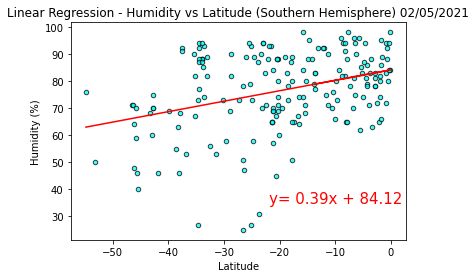

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Latitude"], south_hem["Humidity"])
sh_hum_lat_regress = south_hem["Latitude"] * slope + intercept
sh_hum_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

south_hem.plot.scatter("Latitude", "Humidity", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(south_hem["Latitude"], sh_hum_lat_regress, "r-")
plt.annotate(sh_hum_lat_line_eq, (-22, 35), fontsize=15, color="red")
plt.ylabel("Humidity (%)")
plt.title(f"Linear Regression - Humidity vs Latitude (Southern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/SHLatVsHumidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11696845801466489


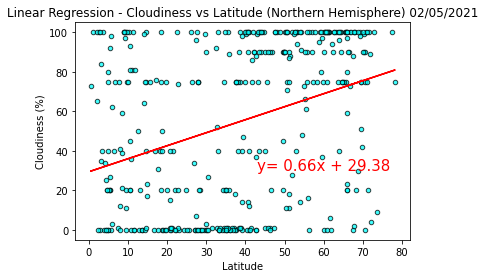

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Latitude"], north_hem["Cloudiness"])
nh_cloud_lat_regress = north_hem["Latitude"] * slope + intercept
nh_cloud_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

north_hem.plot.scatter("Latitude", "Cloudiness", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(north_hem["Latitude"], nh_cloud_lat_regress, "r-")
plt.annotate(nh_cloud_lat_line_eq, (43, 30), fontsize=15, color="red")
plt.ylabel("Cloudiness (%)")
plt.title(f"Linear Regression - Cloudiness vs Latitude (Northern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/NHLatVsCloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07795726279267495


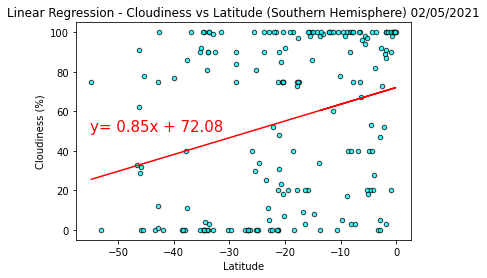

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Latitude"], south_hem["Cloudiness"])
sh_cloud_lat_regress = south_hem["Latitude"] * slope + intercept
sh_cloud_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

south_hem.plot.scatter("Latitude", "Cloudiness", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(south_hem["Latitude"], sh_cloud_lat_regress, "r-")
plt.annotate(sh_cloud_lat_line_eq, (-55, 50), fontsize=15, color="red")
plt.ylabel("Cloudiness (%)")
plt.title(f"Linear Regression - Cloudiness vs Latitude (Southern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/SHLatVsCloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.012588656119412268


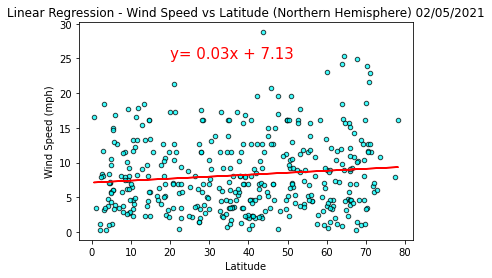

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Latitude"], north_hem["Wind Speed"])
nh_wind_lat_regress = north_hem["Latitude"] * slope + intercept
nh_wind_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

north_hem.plot.scatter("Latitude", "Wind Speed", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(north_hem["Latitude"], nh_wind_lat_regress, "r-")
plt.annotate(nh_wind_lat_line_eq, (20, 25), fontsize=15, color="red")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Linear Regression - Wind Speed vs Latitude (Northern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/NHLatVsWind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09821762079257285


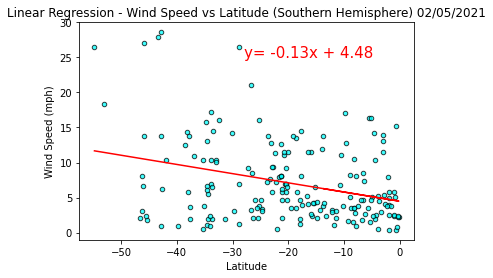

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Latitude"], south_hem["Wind Speed"])
sh_wind_lat_regress = south_hem["Latitude"] * slope + intercept
sh_wind_lat_line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

south_hem.plot.scatter("Latitude", "Wind Speed", alpha=0.75, edgecolor="black", color="cyan")
plt.plot(south_hem["Latitude"], sh_wind_lat_regress, "r-")
plt.annotate(sh_wind_lat_line_eq, (-28, 25), fontsize=15, color="red")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Linear Regression - Wind Speed vs Latitude (Southern Hemisphere) " + str(request_date))

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/SHLatVsWind.png")
plt.show()

## Data Analysis
1. 
2. 
3. 
